### 3

In [1]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')

### 4

In [ ]:
df.tail()

In [ ]:
df.head()

### 5
**Explanation** 
- Display the information of the DataFrame
    - Type of index,
    - Columns
    - Non-null values
    - Memory usage


In [ ]:
df.info()

### 6
**Explanation** 
- Display the dimensions of the DataFrame.


In [4]:
dimensions = df.shape
nb_rows, nb_columns = dimensions
print(f"Number of variables (columns): {nb_columns}")
print(f"Number of observations (rows): {nb_rows}")


Number of variables (columns): 12
Number of observations (rows): 8807


### 7
**Explanation** 
- Display the columns of the DataFrame

In [ ]:
columns = df.columns
print(columns)

### 8
**Explanation** 
*column_types[column_types.apply(lambda x: pd.api.types.is_numeric_dtype(x))]*
1. `apply()`
    - applies a function to each element of the series column_types
2. `lambda x`
    - pd.api.types.is_numeric_dtype(x) is a lambda function that checks if the type x is numeric using pd.api.types.is_numeric_dtype(x)
- This expression returns a series of boolean values (True or False), where True indicates that the corresponding column is numeric.


In [ ]:
column_types = df.dtypes

quantitative_columns = column_types[column_types.apply(lambda x: pd.api.types.is_numeric_dtype(x))]
qualitative_columns = column_types[column_types.apply(lambda x: pd.api.types.is_categorical_dtype(x) or pd.api.types.is_object_dtype(x))]

print("\nQuantitative columns:")
print(quantitative_columns)
print("\nQualitative columns:")
print(qualitative_columns)


### 9
**Explanation** 
1. `missing_data = df.isnull().sum()`
    - Creates a series `missing_data` with missing values per column.

2. `total_missing_data = df.isnull().sum().sum()`
    - Calculates total missing values in the DataFrame.

3. `missing_proportion = (missing_data / len(df)) * 100`
    - Calculates missing values proportion per column as a percentage.

4. `total_cells = df.size`
    - Calculates total number of cells in the DataFrame.

5. `total_missing_percentage = (total_missing_data / total_cells) * 100`
    - Calculates total missing values percentage across the DataFrame.

6. Displaying the results
    - `print("Missing data per column:")` displays missing values per column.   
    - `print(missing_data)` displays `missing_data`.
    - `print(f"Total percentage of missing data: {total_missing_percentage:.2f}%")` displays total missing values percentage.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_data = df.isnull().sum()
total_missing_data = df.isnull().sum().sum()
missing_proportion = (missing_data / len(df)) * 100
total_cells = df.size
total_missing_percentage = (total_missing_data / total_cells) * 100

plt.figure(figsize=(10,6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette="Blues_r")
plt.xlabel('\n Column', fontsize=15, color='#2b50bf')
plt.ylabel("Nb Missing Data\n", fontsize=15, color='#2b50bf')
plt.title("Nb missing data per colomn\n", fontsize=18, color='#3b79e5')
plt.xticks(rotation= 45)
plt.tight_layout()

plt.show()

print("Total percentage of missing data:", total_missing_percentage)


### 10
**Explanation** 
1. `msno.matrix(df)` or `msno.bar(df)` 
   - Creates a "matrix" plot to visualize missing data in the DataFrame df
   - Create a histogram showing the number of missing data for each column in the DataFrame df
2. `plt.title('Visualization of missing data with matrix')` or `plt.title('Histogram of missing data with bars')`
   - Sets the title of the plot.
3. `plt.show()`
   - Displays the plot on the screen.

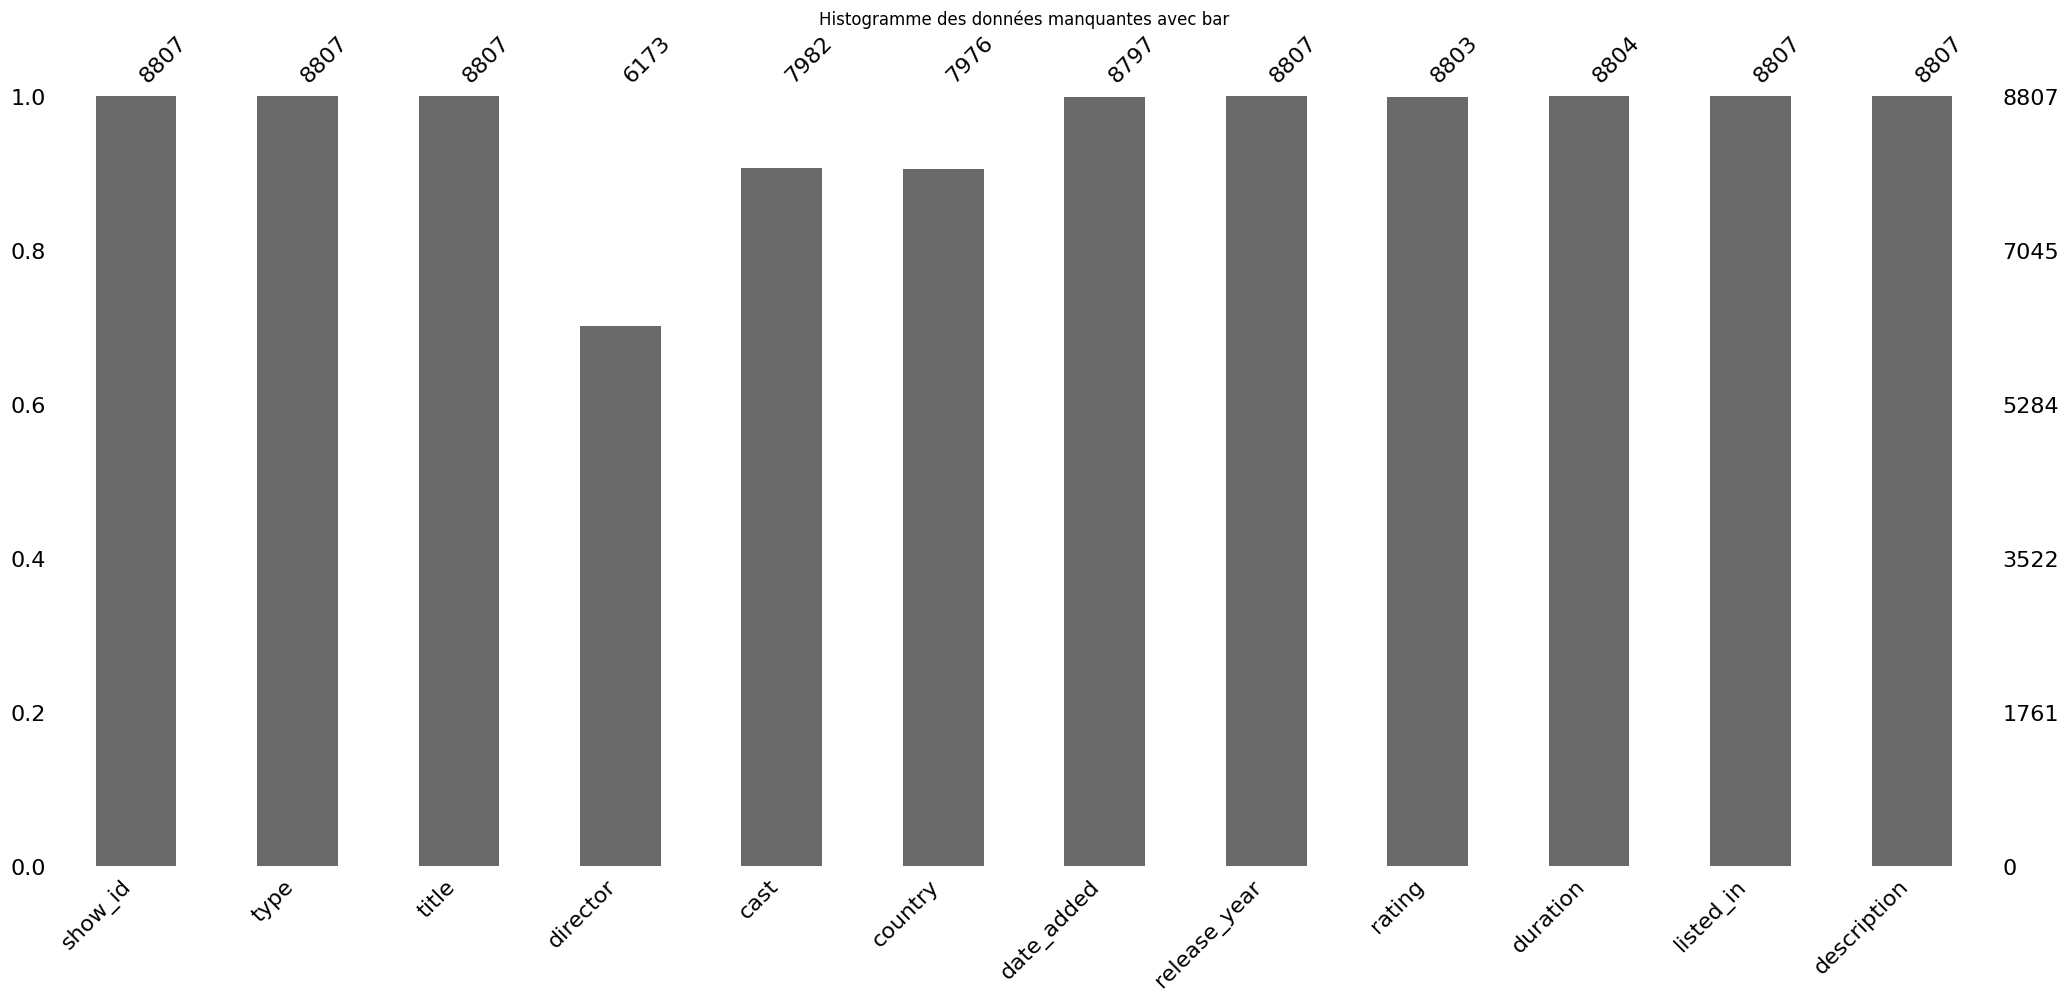

In [12]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df)
plt.title('Histogramme des données manquantes avec bar')
plt.show()

# msno.matrix(df)
# plt.title('Visualization of missing data with matrix')
# plt.show()


### 11
**Explanation** 
1. `random_observation = df.sample()` 
   - Selects a random observation from the DataFrame df.
2. `print(random_observation)`
   - Displays the selected random observation.


In [ ]:
random_observation = df.sample()
print(random_observation)

### 12
**Explanation** 
1. `df['Titre'] == 'Catch Me If You Can'` 
   - Crée un masque booléen qui sélectionne toutes les lignes où la colonne "Titre" est égale à "Catch Me If You Can".
2. `df[...]`
   - Filtre le DataFrame en utilisant ce masque pour sélectionner toutes les informations relatives à l'œuvre "Catch Me If You Can".
3. `print(info_catch_me)`
    -  Affiche ces informations.

In [ ]:
info = df[df['title'] == 'Catch Me If You Can']
print(info)

### 13 | 14
**Explanation** 
1. `df.query("type == 'TV Show'")` or `df.query("type == 'Movie'")`
   - Filter the DataFrame to select only the films with type "Movie" or "TV Show"
1. `df.sort_values(by='release_year', ascending=False)` 
   - Sorts the DataFrame by the "release_year" column in descending order (from newest to oldest)
2. `.iloc[0]['Titre'] `
   - Selects the movie title in the first row (the most recent movie) of the sorted DataFrame
3. `print(f"The most recent film is : {most_recent_film}")`
    - Displays the name of the most recent movie

In [ ]:
most_recent_film = df.query("type == 'Movie'").sort_values(by='release_year', ascending=False).iloc[0]['title']
print(f"The most recent film is : {most_recent_film}")

In [ ]:
most_recent_tv_show = df.query("type == 'TV Show'").sort_values(by='release_year', ascending=False).iloc[0]['title']
print(f"The most recent film is : {most_recent_tv_show}")

### 15
**Explanation** 
1. `df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')`
   - Convert the date_added column to DateTime type
1. `print("date_added : ", df.dtypes['date_added'])` 
   - Display the data type of the date_added column.

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print("date_added : ",df.dtypes['date_added'])

date_added :  datetime64[ns]


### 16
**Explanation** 
1. `df.loc[df['type'] == 'Movie', 'duration'] = df[df['type'] == 'Movie']['duration'].str.replace(' min', '').astype(float)`
   - Convert the duration to minutes for entries of type "Movie"
1. `print(df[df['type'] == 'Movie'][['type', 'duration']])` 
   - Display the 'type' and 'duration' columns for entries of type "Movie"


In [8]:
df.loc[df['type'] == 'Movie', 'duration'] = df[df['type'] == 'Movie']['duration'].str.replace(' min', '').astype(float)
print(df[df['type'] == 'Movie'][['type', 'duration']])

       type duration
0     Movie     90.0
6     Movie     91.0
7     Movie    125.0
9     Movie    104.0
12    Movie    127.0
...     ...      ...
8801  Movie     96.0
8802  Movie    158.0
8804  Movie     88.0
8805  Movie     88.0
8806  Movie    111.0

[6131 rows x 2 columns]


In [59]:
df.loc[df['type'] == 'TV Show', 'duration'] = df[df['type'] == 'TV Show']['duration'].str.replace(' Seasons?', '').astype(float)
print(df[df['type'] == 'TV Show'][['type', 'duration']])


ValueError: could not convert string to float: '2 Seasons'

### 15
**Explanation** 
1. `df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')`
   - Convert the date_added column to DateTime type
1. `print("date_added : ", df.dtypes['date_added'])` 
   - Display the data type of the date_added column.

In [9]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
